In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers, Sequential
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "MedicinalLeafDataset",
    shuffle = True,
    image_size = (IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 741 files belonging to 7 classes.


In [4]:
class_names = dataset.class_names
class_names

['Aloevera',
 'Bamboo',
 'Chilly',
 'Eucalyptus',
 'Guava',
 'Hibiscus',
 'Jackfruit']

(32, 256, 256, 3)
[3 3 3 4 5 5 4 1 1 6 4 5 5 6 3 4 3 5 4 3 2 5 4 3 5 1 0 3 5 4 5 0]


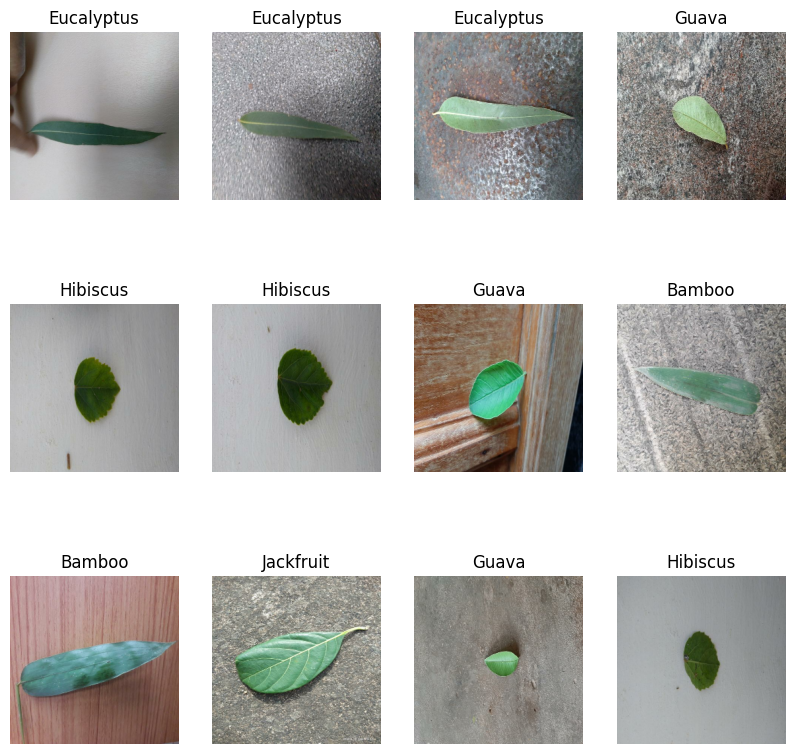

In [5]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
80% ==>Training
10% ==> Validation
10% ==> Test

In [6]:
train_size = 0.8
len(dataset)*train_size

19.200000000000003

In [7]:
train_ds = dataset.take(19)
len(train_ds)

19

In [8]:
test_ds = dataset.skip(19)
len(test_ds)

5

In [9]:
val_size = 0.1
len(dataset)*val_size

2.4000000000000004

In [10]:
val_ds = test_ds.take(2)
len(val_ds)

2

In [11]:
test_ds = test_ds.skip(2)
len(test_ds)

3

In [12]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    assert(train_split + test_split + val_split) == 1
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [13]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [14]:
len(train_ds)

19

In [15]:
len(val_ds)

2

In [16]:
len(test_ds)

3

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [18]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.5716287  0.5677071  0.4971189 ]
  [0.57118064 0.5672591  0.49667084]
  [0.50815743 0.5007279  0.44066355]
  ...
  [0.40445292 0.38918027 0.35388616]
  [0.4636781  0.4519134  0.41661927]
  [0.44665647 0.42704862 0.40936565]]

 [[0.45681342 0.4489703  0.3902693 ]
  [0.59407    0.5862269  0.5275259 ]
  [0.69623137 0.6883882  0.62968725]
  ...
  [0.483892   0.46861932 0.4333252 ]
  [0.49771753 0.48595282 0.4506587 ]
  [0.45869094 0.44300467 0.4076344 ]]

 [[0.40516287 0.3973197  0.34774864]
  [0.49013743 0.4822943  0.43272322]
  [0.4684422  0.46059906 0.41102797]
  ...
  [0.5654893  0.5502166  0.5149225 ]
  [0.42677385 0.41500914 0.37971503]
  [0.40957174 0.39388546 0.34987292]]

 ...

 [[0.39539868 0.42566827 0.40103593]
  [0.3901499  0.41760087 0.3901499 ]
  [0.31922823 0.33966327 0.313473  ]
  ...
  [0.4251053  0.40941903 0.36586818]
  [0.5886501  0.57296383 0.525905  ]
  [0.49519473 0.47166532 0.4246065 ]]

 [[0.47187692 0.4916073  0.46801662]
  [0.37708047 0.39681086 0.36935988]


In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [21]:
from tensorflow.keras import Input

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # Remove batch size
n_classes = 7

model = Sequential([
    Input(shape=input_shape),  # Explicitly define input shape
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,671 (506.53 KB)

 Trainable params: 129,671 (506.53 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [24]:
EPOCHS = 50

history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose = 1,
    epochs = EPOCHS
)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 500ms/step - accuracy: 0.1906 - loss: 1.9241 - val_accuracy: 0.2432 - val_loss: 1.8379
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 472ms/step - accuracy: 0.2747 - loss: 1.7457 - val_accuracy: 0.4324 - val_loss: 1.4932
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 463ms/step - accuracy: 0.4022 - loss: 1.5198 - val_accuracy: 0.5405 - val_loss: 1.3472
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 466ms/step - accuracy: 0.5276 - loss: 1.2643 - val_accuracy: 0.5405 - val_loss: 1.1875
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 463ms/step - accuracy: 0.5714 - loss: 1.1394 - val_accuracy: 0.5405 - val_loss: 1.2189
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 463ms/step - accuracy: 0.5994 - loss: 1.0575 - val_accuracy: 0.5676 - val_loss: 1.1440
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 457ms/step - accuracy: 0.5982 - loss: 0.9782 - val_accuracy: 0.5405 - val_loss: 1.2771
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 457ms/step - accuracy: 0.6611 - loss: 0.9032 - val_accuracy: 0

In [25]:
scores = model.evaluate(test_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.8151 - loss: 0.4160


In [26]:
scores

[0.4322793483734131, 0.8020833134651184]

In [27]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 19}

In [28]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

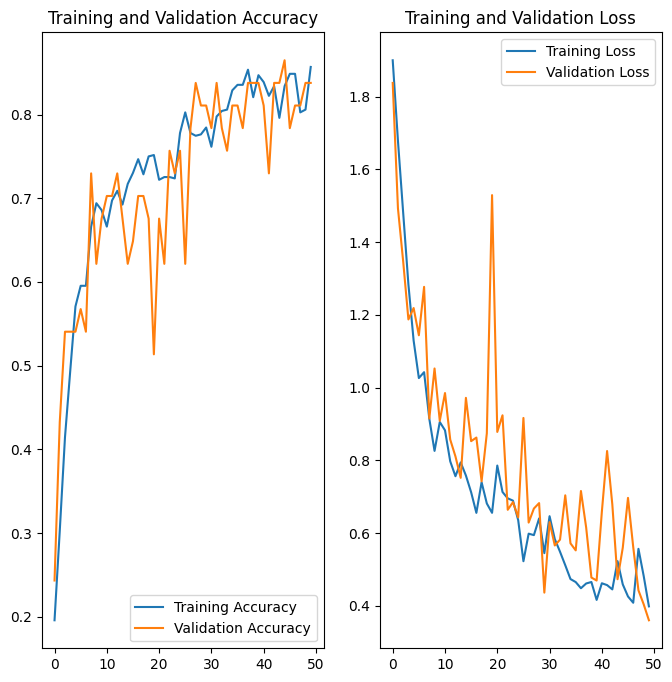

In [30]:
plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
Actual Label Hibiscus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Predicted Label Hibiscus


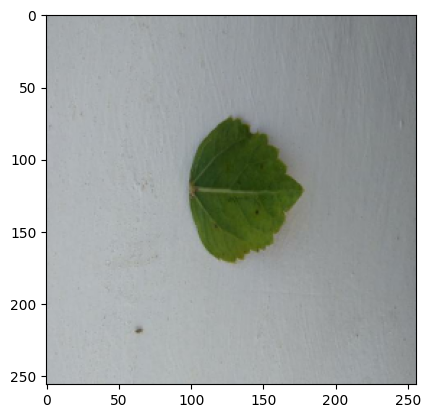

In [31]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label", class_names[labels_batch[0].numpy()])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted Label", class_names[np.argmax(batch_prediction[0])])

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


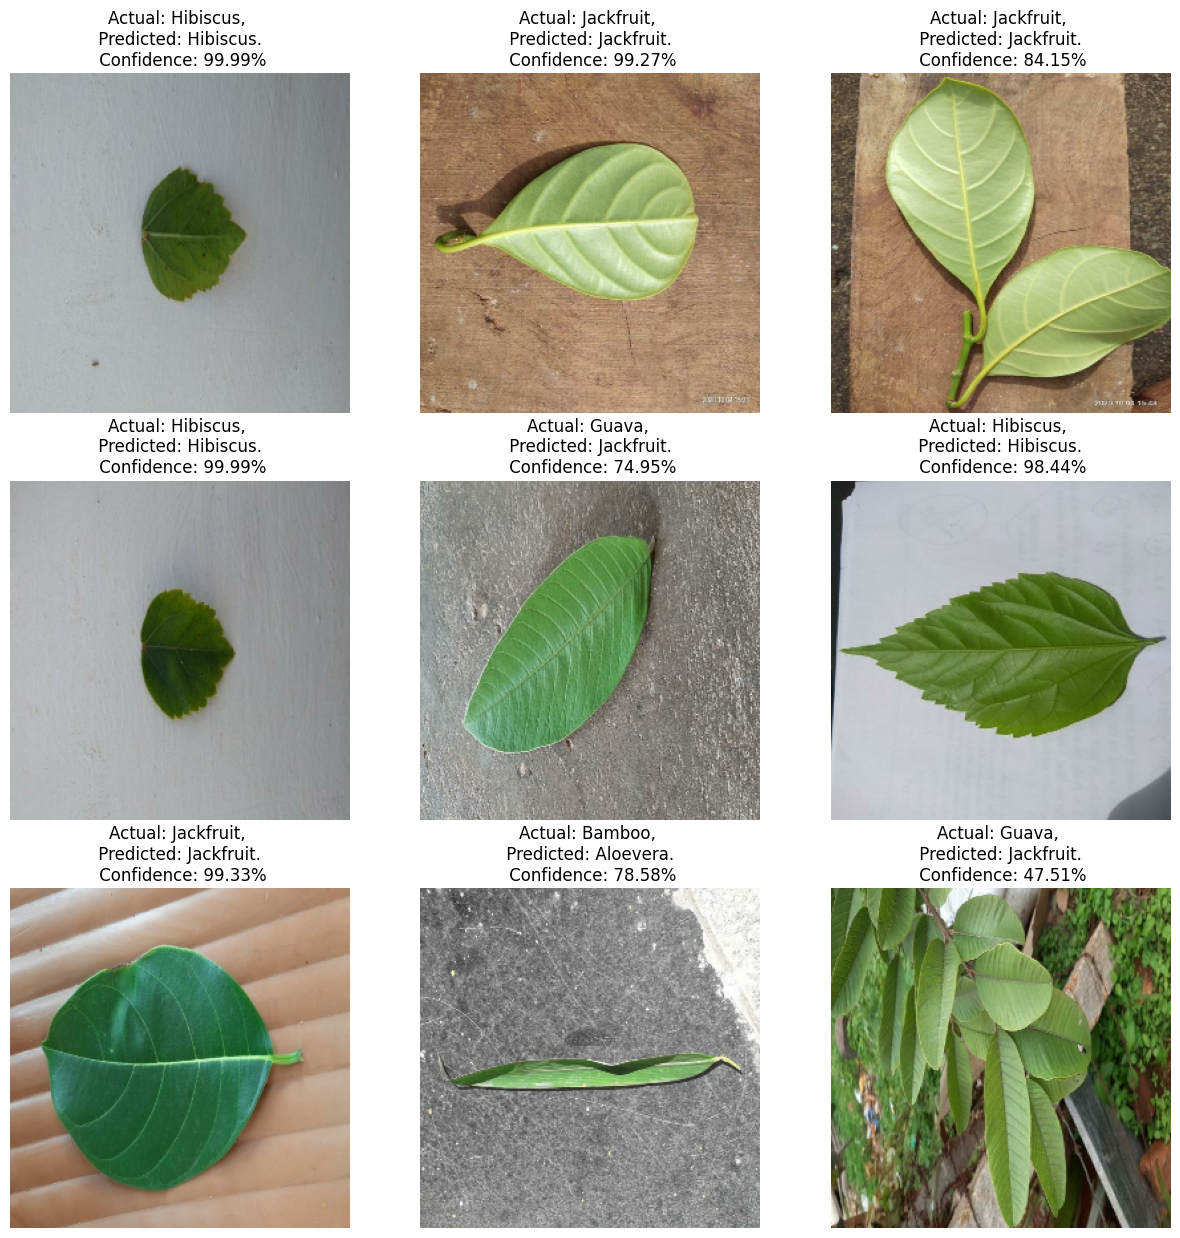

In [33]:
plt.figure(figsize = (15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())

        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence}%")
        plt.axis("off")

In [34]:
import os

save_dir = "../saved_models"

if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
model.save(f"{save_dir}/1.keras")